<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
movie_df=pd.read_csv('./../data/processed.csv')
movie_df.sample(10)

Name  Released year  \
2220                       Wind River           2017   
993         Six Swedish Girls in Alps           1983   
540   The Lion King II: Simba's Pride           1998   
211                   The Dark Knight           2008   
2641                   The Lighthouse           2019   
1299                           Heroic           2023   
1026             The Princess Diaries           2001   
2843                       The Hobbit           1977   
2583                        Quiz Lady           2023   
2451                  The Running Man           1987   

                                                  Genre             Director  \
2220            'Crime', 'Drama', 'Mystery', 'Thriller'      Taylor Sheridan   
993                                 'Romance', 'Comedy'            Paul Grau   
540        'Family', 'Adventure', 'Animation', 'Action'     Linda Woolverton   
211              'Drama', 'Action', 'Crime', 'Thriller'    Christopher Nolan   
2641           'Drama', 'Fantasy', 'Thriller', 'Horror'        Robert Eggers   
1299                                'Drama', 'Thriller'         David Zonana   
1026                      'Comedy', 'Family', 'Romance'       Garry Marshall   
2843  'Family', 'Fantasy', 'Animation', 'Adventure',...   Arthur Rankin, Jr.   
2583                                           'Comedy'           Jessica Yu   
2451            'Action', 'Science Fiction', 'Thriller'  Paul Michael Glaser   

      Runtime (h)  Score    Status            Language   Budget ($)  \
2220         1.78   74.0  Released             English   11000000.0   
993          1.50   59.0  Released              German          NaN   
540          1.35   69.0  Released             English          NaN   
211          2.53   85.0  Released             English  185000000.0   
2641         1.82   75.0  Released             English   11000000.0   
1299         1.47   66.0  Released  Spanish; Castilian          NaN   
1026         1.92   69.0  Released             English   37000000.0   
2843         1.28   66.0  Released             English    3000000.0   
2583         1.67   68.0  Released             English          NaN   
2451         1.68   65.0  Released             English   27000000.0   

       Revenue ($)  
2220  4.499825e+07  
993            NaN  
540            NaN  
211   1.004558e+09  
2641  1.812985e+07  
1299           NaN  
1026  1.653352e+08  
2843           NaN  
2583           NaN  
2451  3.812210e+07

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5000 non-null   object 
 1   Released year  5000 non-null   int64  
 2   Genre          4994 non-null   object 
 3   Director       4995 non-null   object 
 4   Runtime (h)    4729 non-null   float64
 5   Score          5000 non-null   float64
 6   Status         5000 non-null   object 
 7   Language       5000 non-null   object 
 8   Budget ($)     3275 non-null   float64
 9   Revenue ($)    3385 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


> **NOTES:**
>
> - The dataset: The sample consists of 5000 movies from popular films according to https://www.themoviedb.org/movie.
>
> - The "Status" column in the data is mostly set to the value "Released" because there are few movies known to be in production or have just been completed.
>
> - As these are popular movies worldwide, the language of these films is predominantly English.

# Question 1: Net profit and net profit margin of movie industry through time (1961-now)

## Step 0: Purpose 

- Identify the market trends in the film production industry over the years, especially in recent times.
- Answering these questions will help formulate a strategy and decide whether it is advisable to produce films at the current time or not.

## Step 1: Analyzing

- Calculate `Net profit = Revenue - Budget`.
- Calculate `Net profit margin = Net profit / Revenue`.
- Get only the year from 1961 (index = 25).

In [4]:
cleaned_df = movie_df[['Released year','Budget ($)','Revenue ($)']].dropna()
cleaned_df['Net profit'] = cleaned_df['Revenue ($)']-cleaned_df['Budget ($)']
cleaned_df['Net profit margin'] = (cleaned_df['Revenue ($)']-cleaned_df['Budget ($)'])/cleaned_df['Revenue ($)']
cleaned_df = cleaned_df.groupby('Released year').mean()
cleaned_df = cleaned_df.iloc[25:]
cleaned_df

Budget ($)   Revenue ($)    Net profit  Net profit margin
Released year                                                             
1961           4.284250e+06  8.897500e+07  8.469075e+07           0.792492
1962           7.733333e+06  4.179871e+07  3.406538e+07           0.785605
1963           4.280000e+06  3.685647e+07  3.257647e+07           0.823427
1964           5.230000e+06  6.493319e+07  5.970319e+07           0.899623
1965           6.325000e+06  1.385671e+08  1.322421e+08           0.948515
...                     ...           ...           ...                ...
2019           6.540769e+07  2.643783e+08  1.989706e+08          -3.027020
2020           5.444927e+07  9.609668e+07  4.164742e+07          -2.278529
2021           7.202993e+07  1.502569e+08  7.822694e+07         -13.504777
2022           5.873064e+07  1.607896e+08  1.020589e+08         -30.928192
2023           6.620874e+07  1.540363e+08  8.782757e+07          -6.993948

[63 rows x 4 columns]

## Step 2: Visualization

- Draw the bar line plot to visualize the data above.

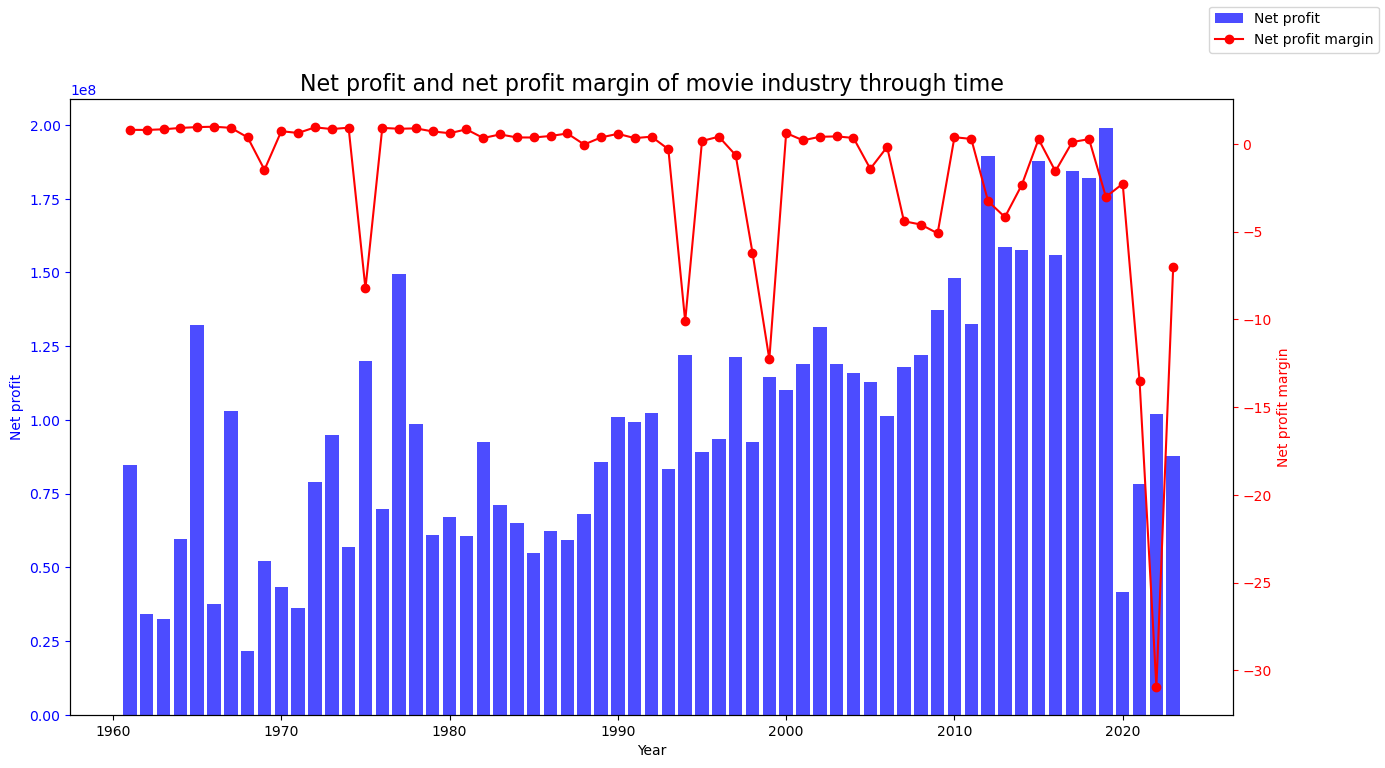

In [5]:
x = cleaned_df.index
y1 = cleaned_df['Net profit']
y2 = cleaned_df['Net profit margin']

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar plot on the primary y-axis (left)
ax1.bar(x, y1, color='b', alpha=0.7, label='Net profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net profit', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', linestyle='-', marker='o', label='Net profit margin')
ax2.set_ylabel('Net profit margin', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
fig.legend()

# Title for the entire plot
plt.title('Net profit and net profit margin of movie industry through time',fontsize=16)

# Show the plot
plt.show()

## Step 3: Give observations

- The average annual profit has been steadily increasing over time.
- The net profit margin has been trending downwards in recent years, especially during the COVID-19 pandemic.
- Since the post-COVID-19 period, the film industry has been showing signs of recovery and growth.
- Film producers should consider focusing on production at this time.

# Question 2: Identify the most successful directors of all time

## Step 0: Purpose

- Look up information on renowned directors so that filmmakers can collaborate for potentially higher profits.
- Movie enthusiasts may be aware of famous directors, allowing them to look up information about their films to watch.

## Step 1: Analyzing

- Get only top 10 directors that have the most total revenue.

In [6]:
cleaned_df = movie_df.groupby('Director')['Revenue ($)'].sum().sort_values(ascending=False).head(10)[::-1]
cleaned_df

Director
Robert Zemeckis      3.772318e+09
Roland Emmerich      4.106669e+09
J.J. Abrams          4.653993e+09
Keith Giffen         4.852415e+09
Steven Spielberg     5.101908e+09
Christopher Nolan    6.093476e+09
David Yates          6.395881e+09
Peter Jackson        6.537412e+09
George Lucas         7.022914e+09
James Cameron        9.019808e+09
Name: Revenue ($), dtype: float64

## Step 2: Visualization

- Using the horizontal bar chart to visualize the data above.

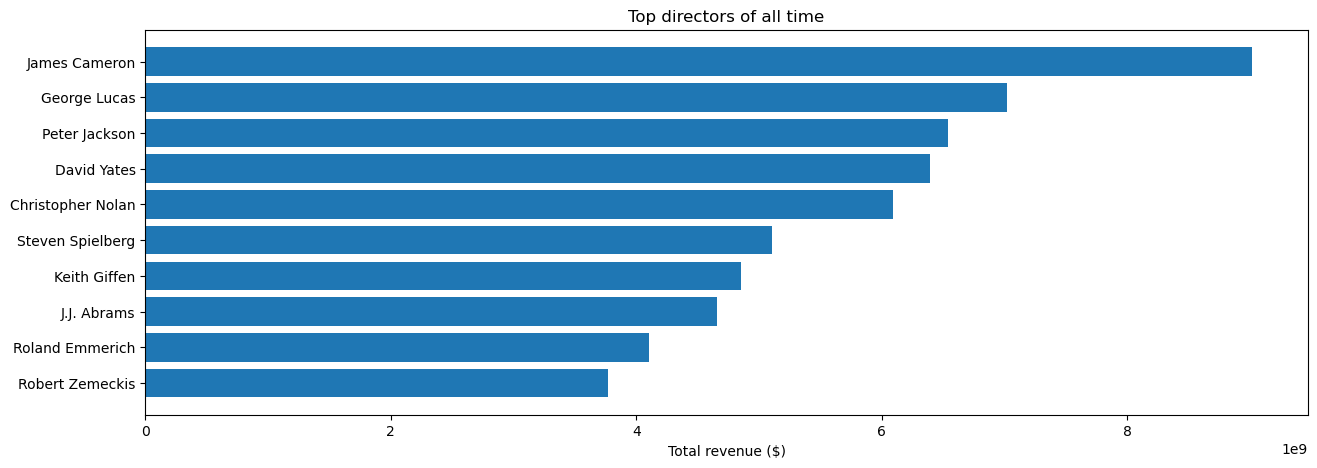

In [7]:
plt.figure(figsize=(15,5))
plt.barh(cleaned_df.index,cleaned_df.values)
plt.title('Top directors of all time')
plt.xlabel('Total revenue ($)')
plt.show()

## Step 3: Give observations

- Based on the chart, we can determine the top 10 directors with the highest revenue from film production.

# Question 3: Identify the most top-rated movies in each genre

## Step 0: Purpose

- Assist viewers in choosing a movie more easily.
- Define a noteworthy film as one that satisfies both of the following criteria:
    - Massive revenue: > the percentile 75% of the revenue column.
    - Among the high-grossing films, select those with the highest ratings; these are the films to be found.

## Step 1: Analyzing

- For convenience, let's only consider the top 10 most high rated films for each genre.

In [8]:
cleaned_df = movie_df[movie_df['Revenue ($)']>movie_df['Revenue ($)'].quantile(0.75)][['Name','Genre',
                                                                                       'Score','Revenue ($)']].reset_index(drop=True)
cleaned_df['Genre'] = cleaned_df['Genre'].str.split(', ')
cleaned_df = cleaned_df.explode('Genre').sort_values(['Genre','Score'],ascending=[True,False]).groupby('Genre').head(10)
cleaned_df

Name      Genre  Score  \
88                                     The Dark Knight   'Action'   85.0   
102      The Lord of the Rings: The Return of the King   'Action'   85.0   
8                  Spider-Man: Across the Spider-Verse   'Action'   84.0   
71   The Lord of the Rings: The Fellowship of the Ring   'Action'   84.0   
73                                           Inception   'Action'   84.0   
..                                                 ...        ...    ...   
342                                       The Revenant  'Western'   75.0   
721                                          True Grit  'Western'   73.0   
150                                              Rango  'Western'   68.0   
675                                    The Lone Ranger  'Western'   61.0   
663                                     Wild Wild West  'Western'   53.0   

      Revenue ($)  
88   1.004558e+09  
102  1.118889e+09  
8    6.905000e+08  
71   8.713684e+08  
73   8.255328e+08  
..            ...  
342  5.329505e+08  
721  2.523000e+08  
150  2.457246e+08  
675  2.605021e+08  
663  2.221047e+08  

[167 rows x 4 columns]

## Step 2: Visualization

- Using the dual bar chart to visualize the data above.

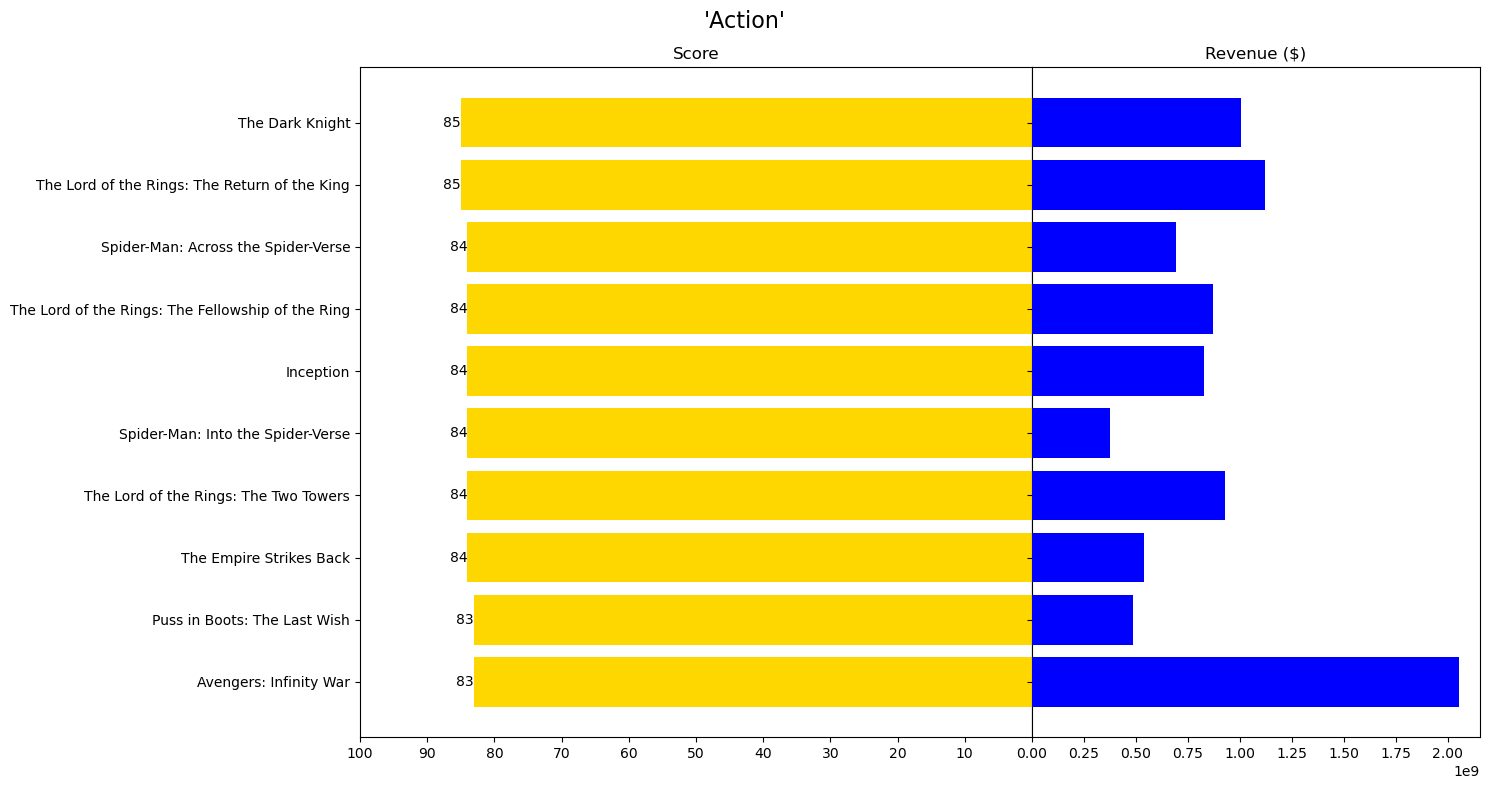

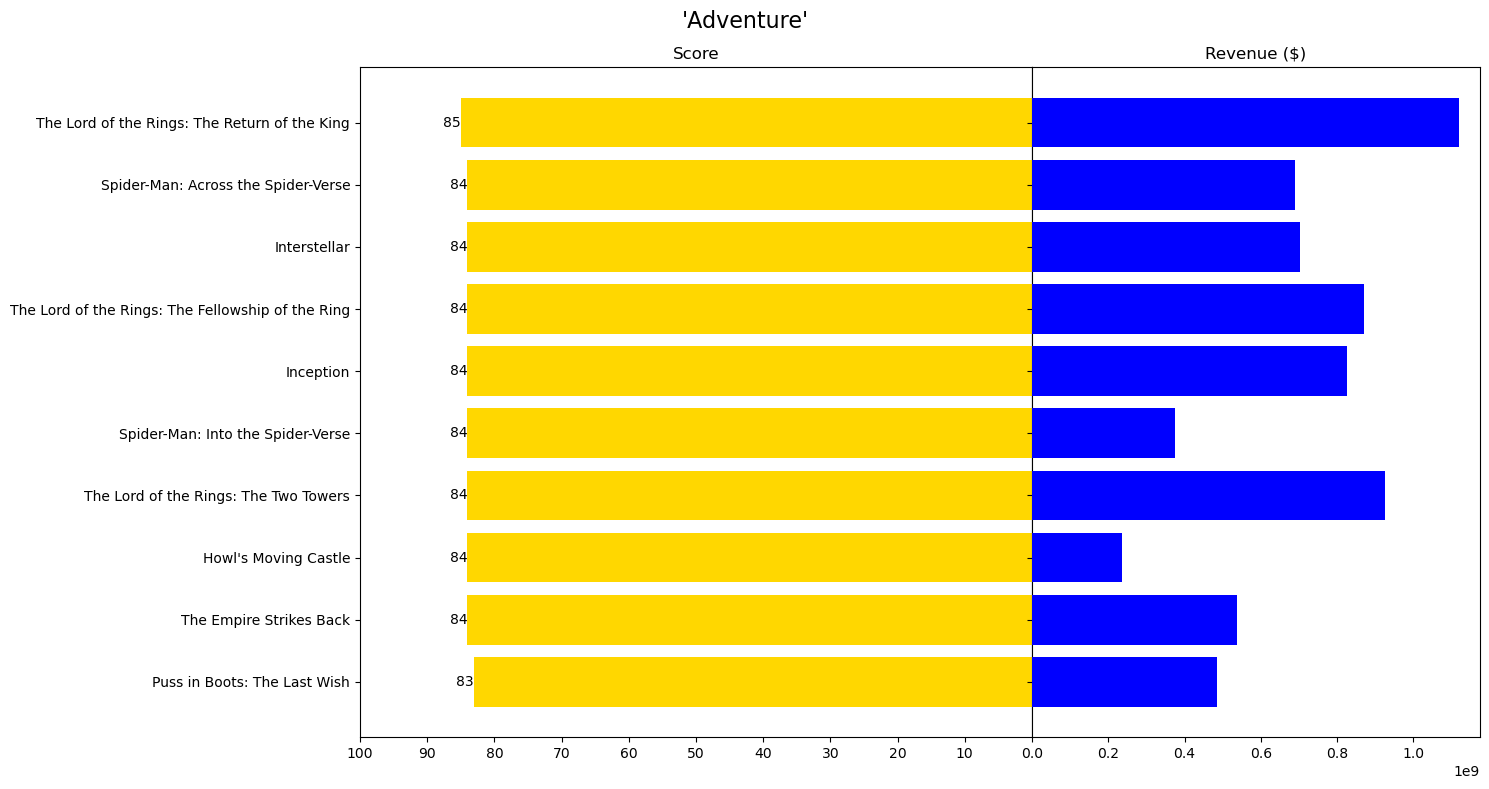

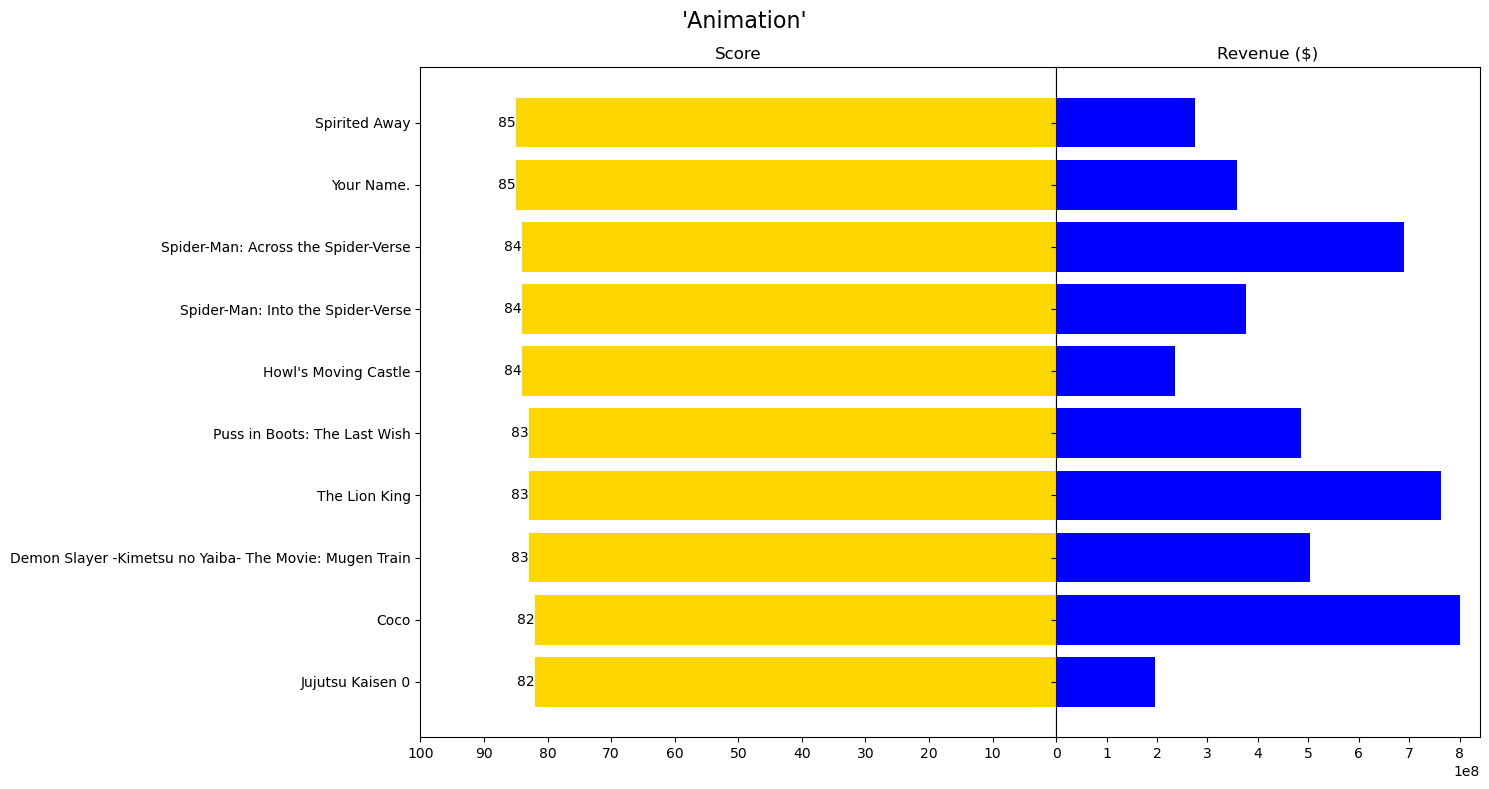

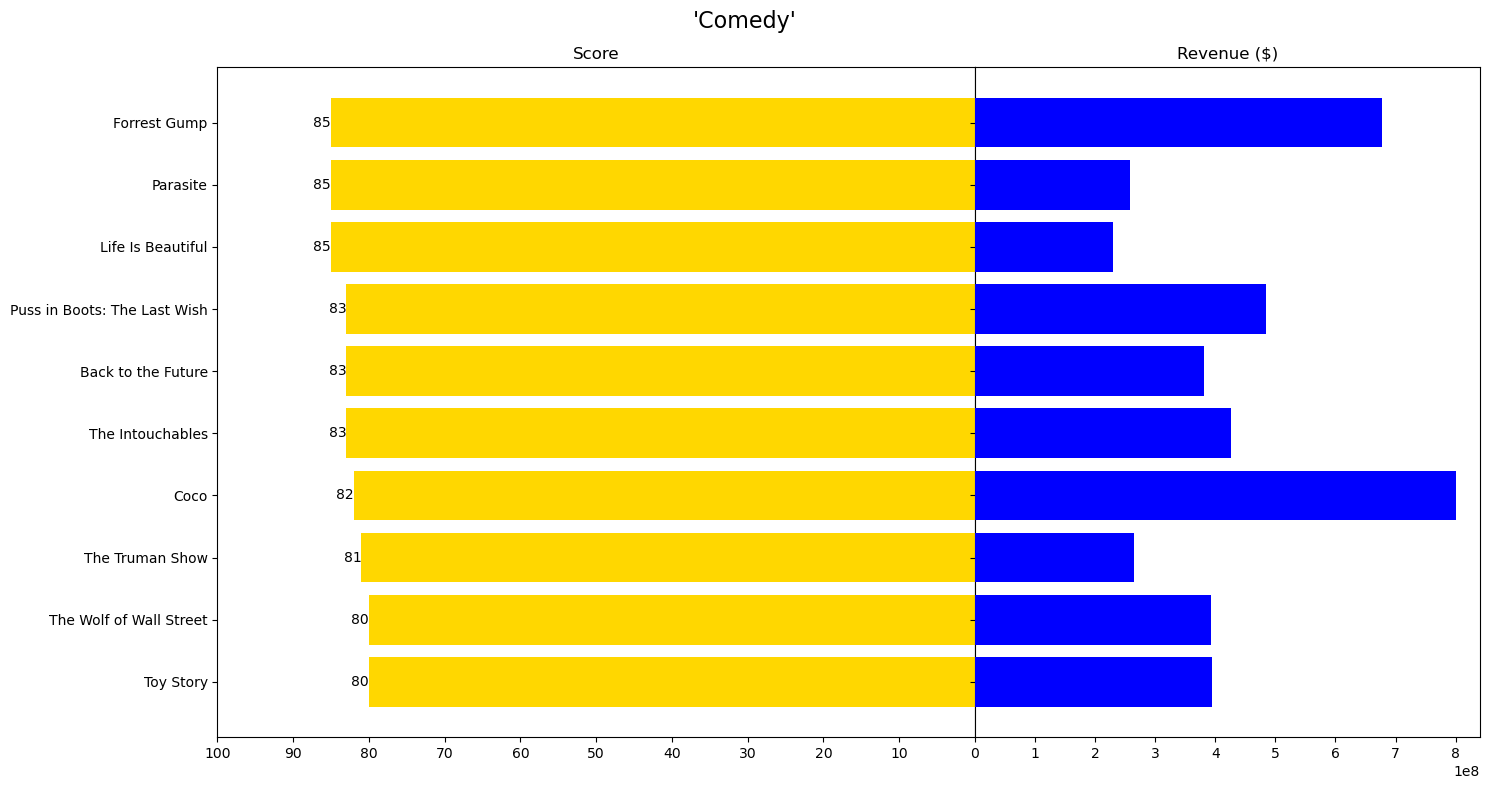

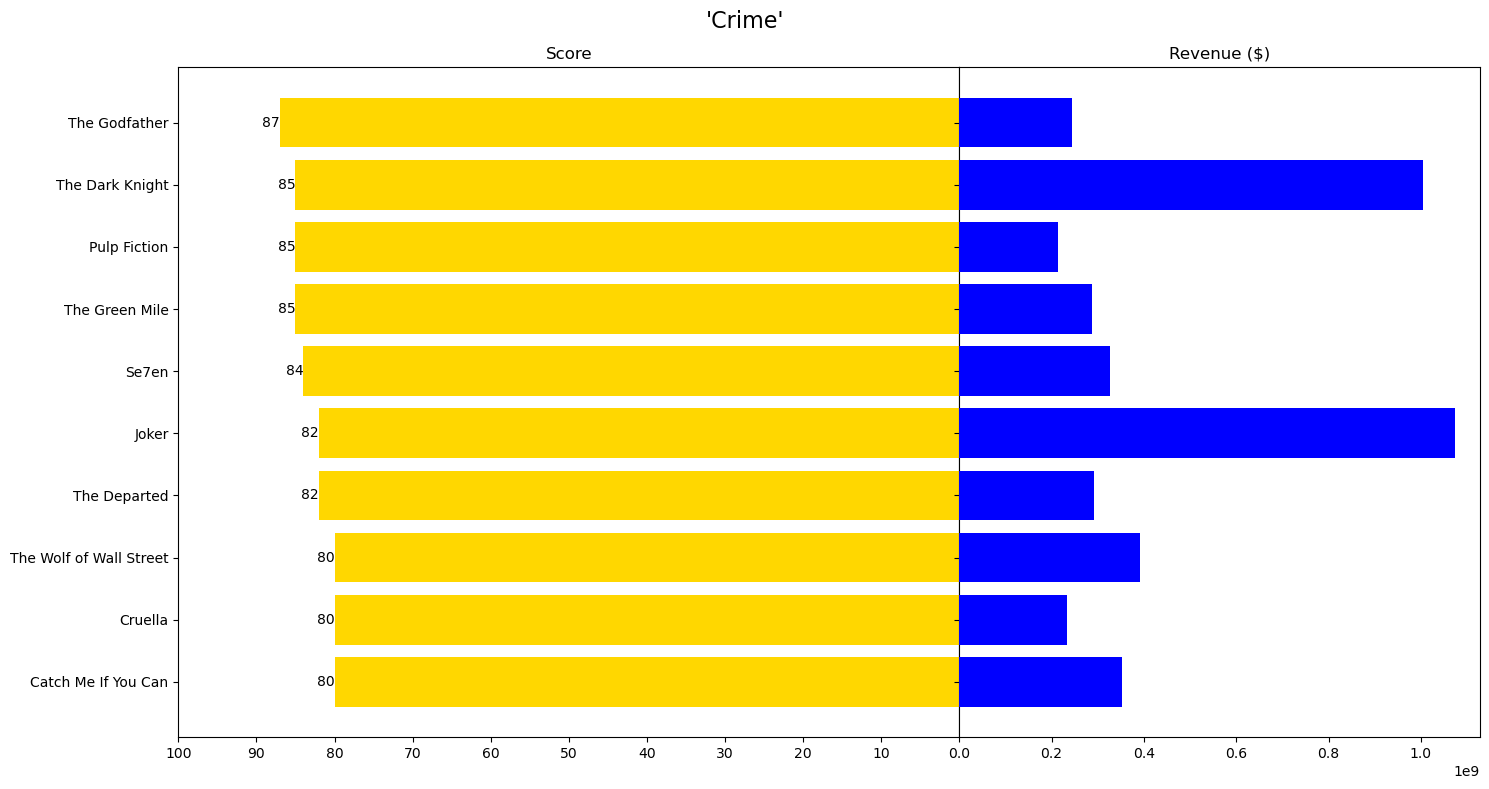

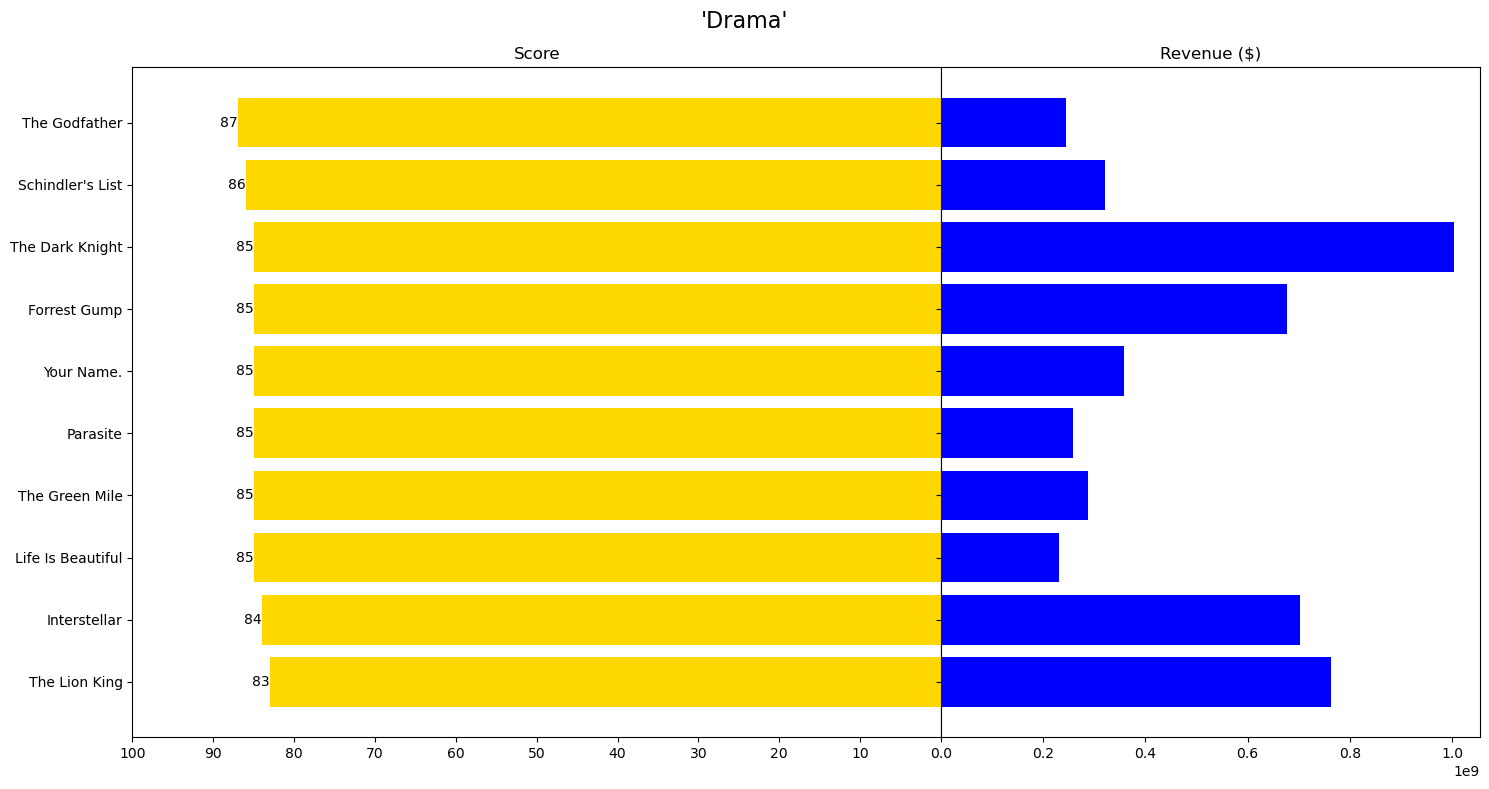

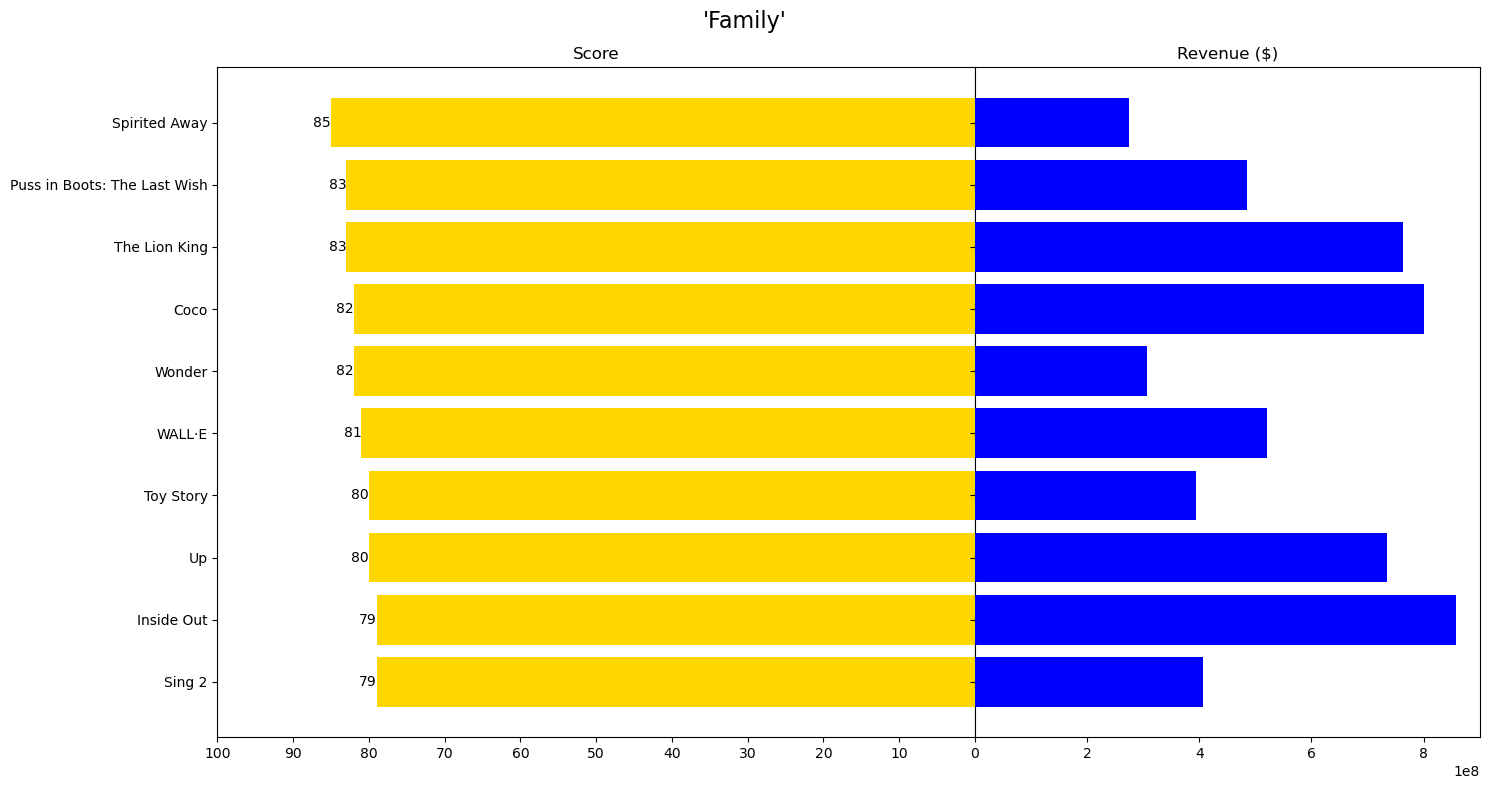

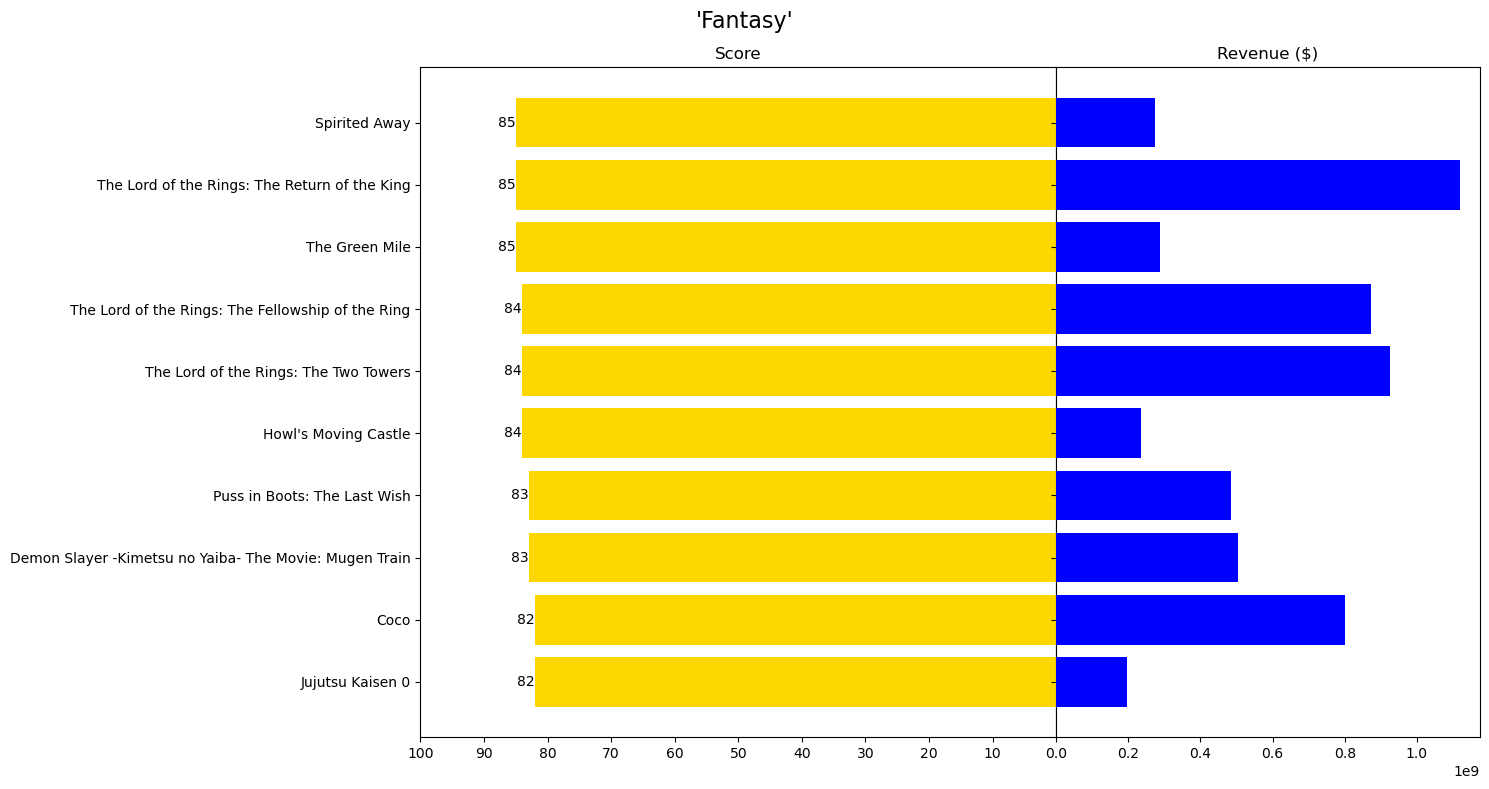

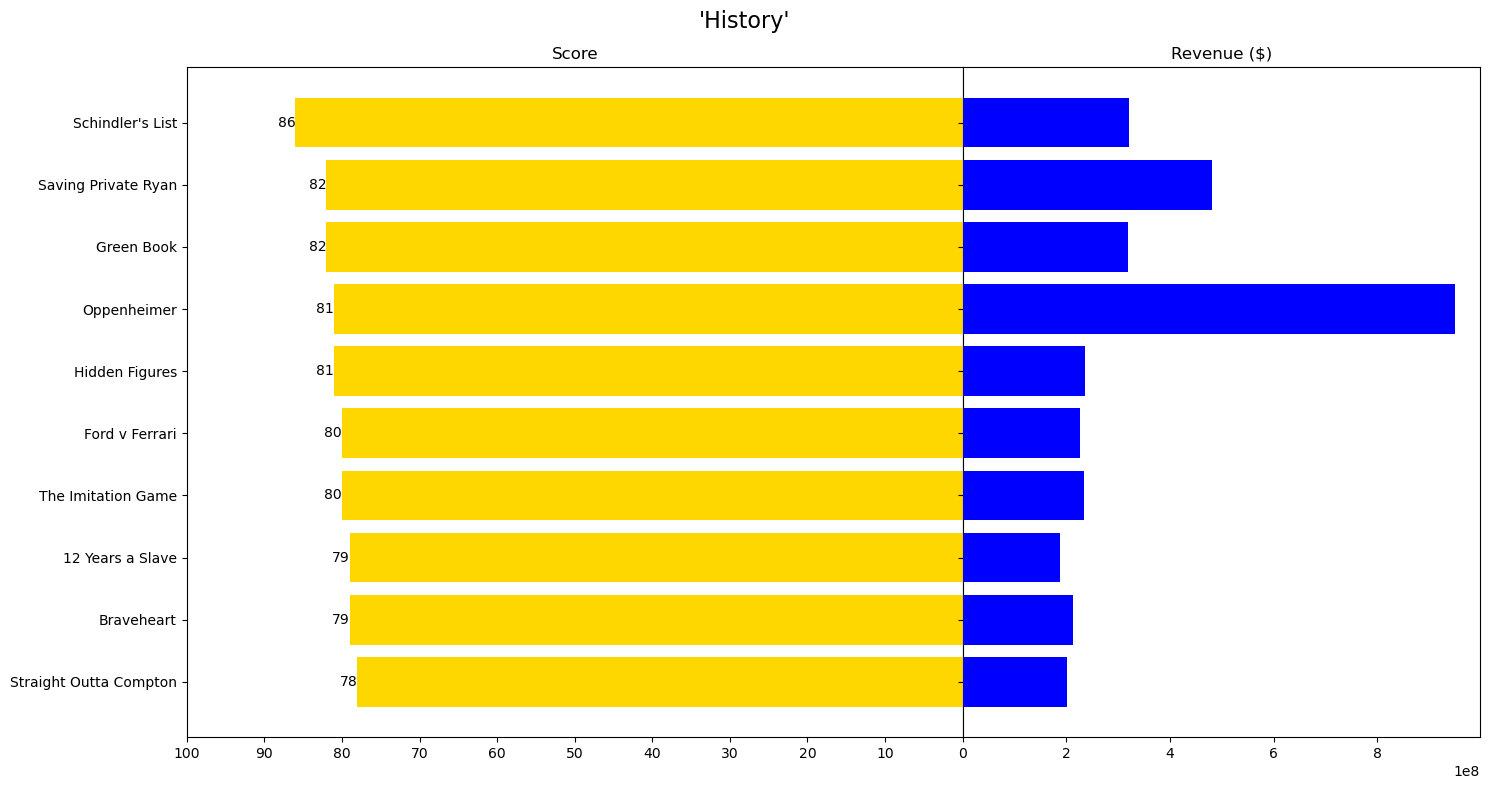

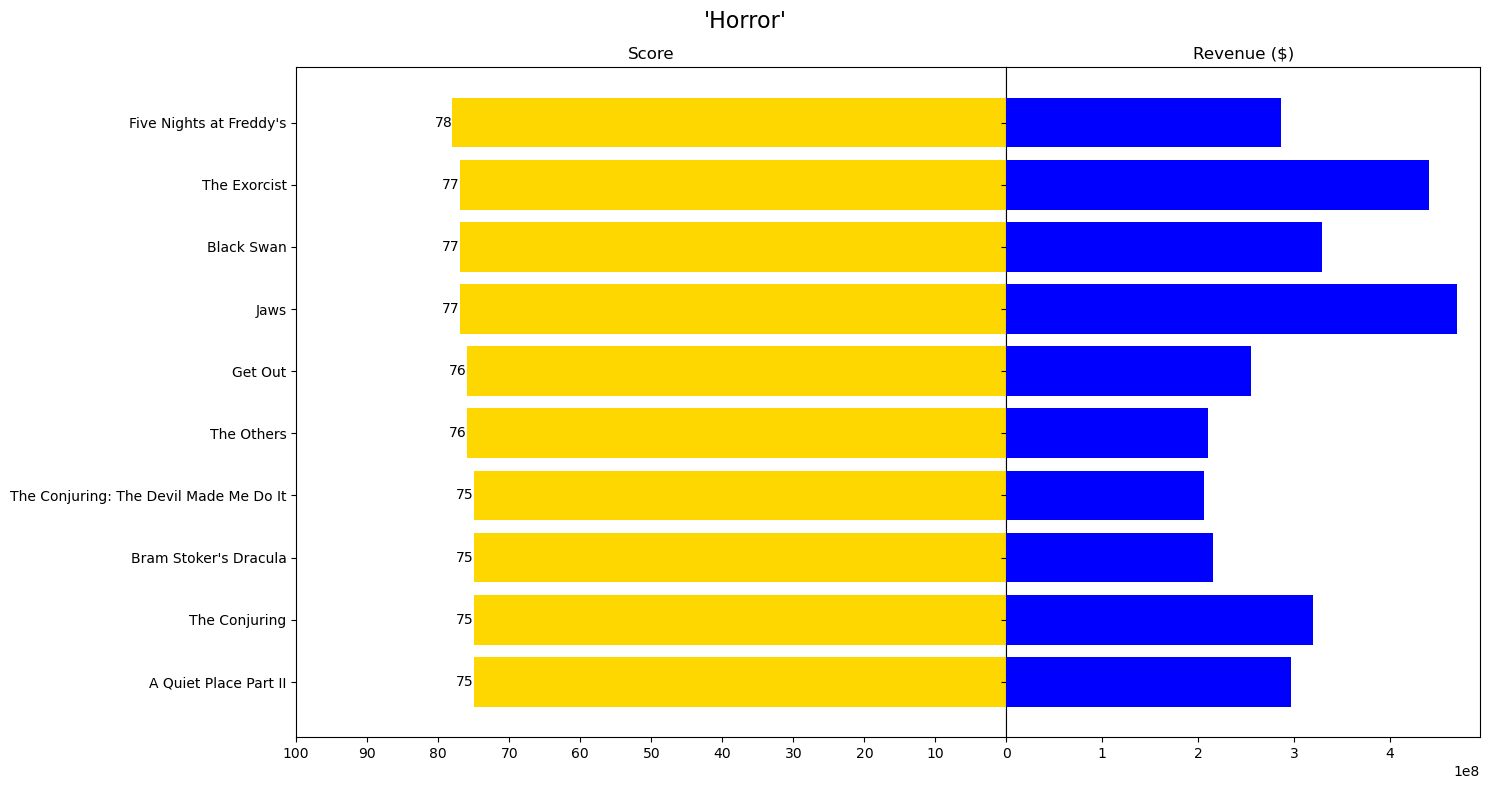

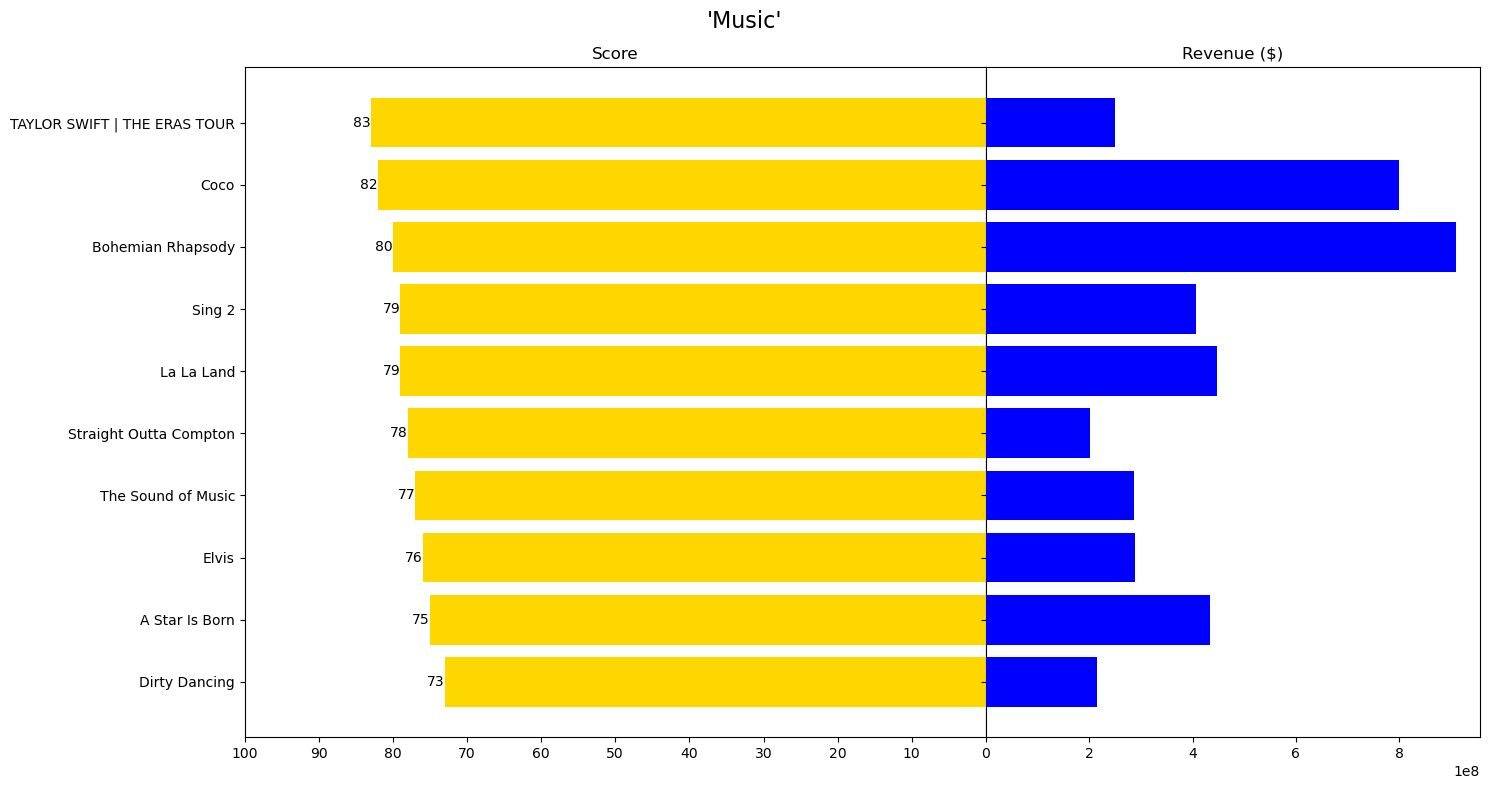

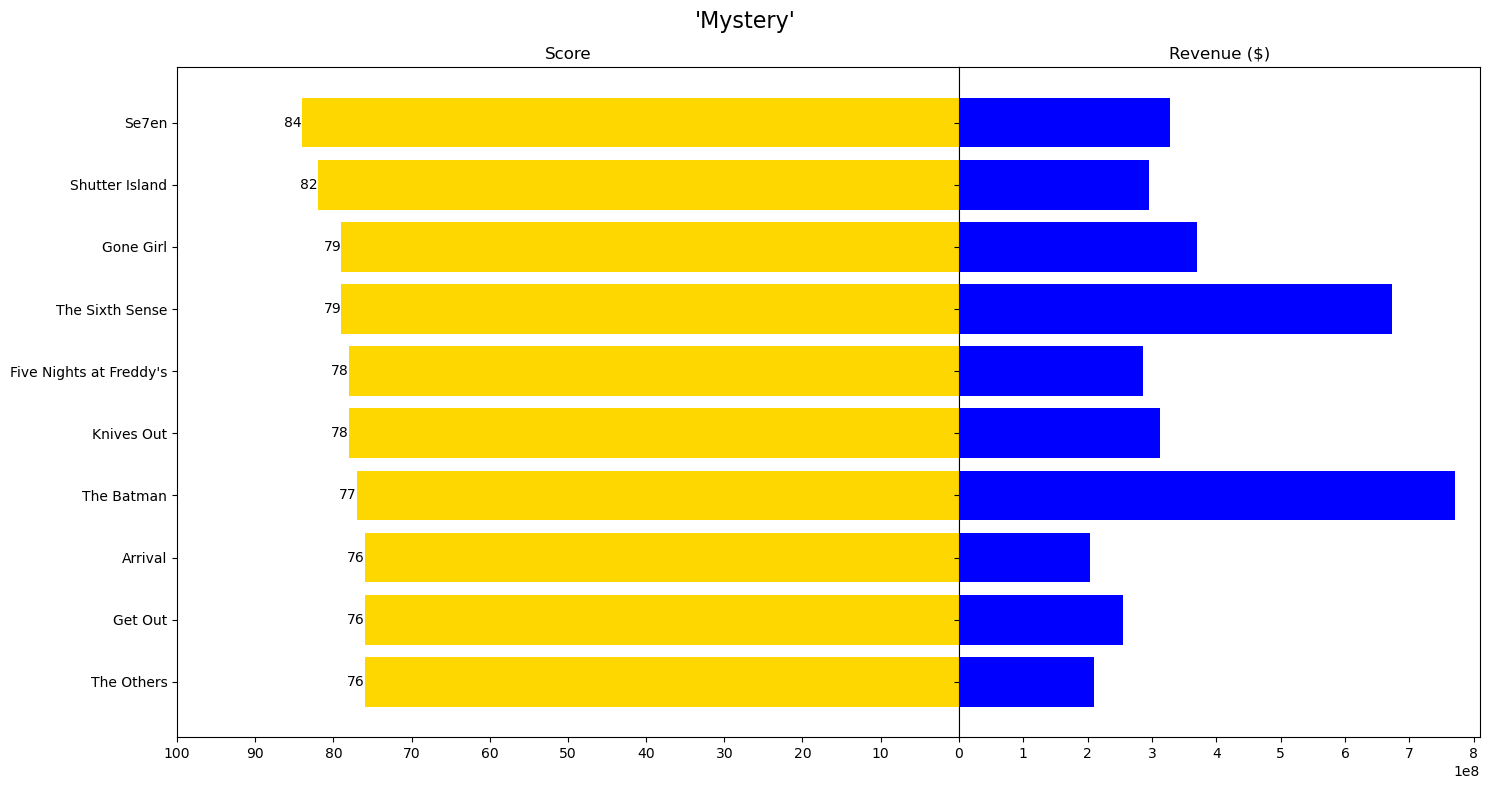

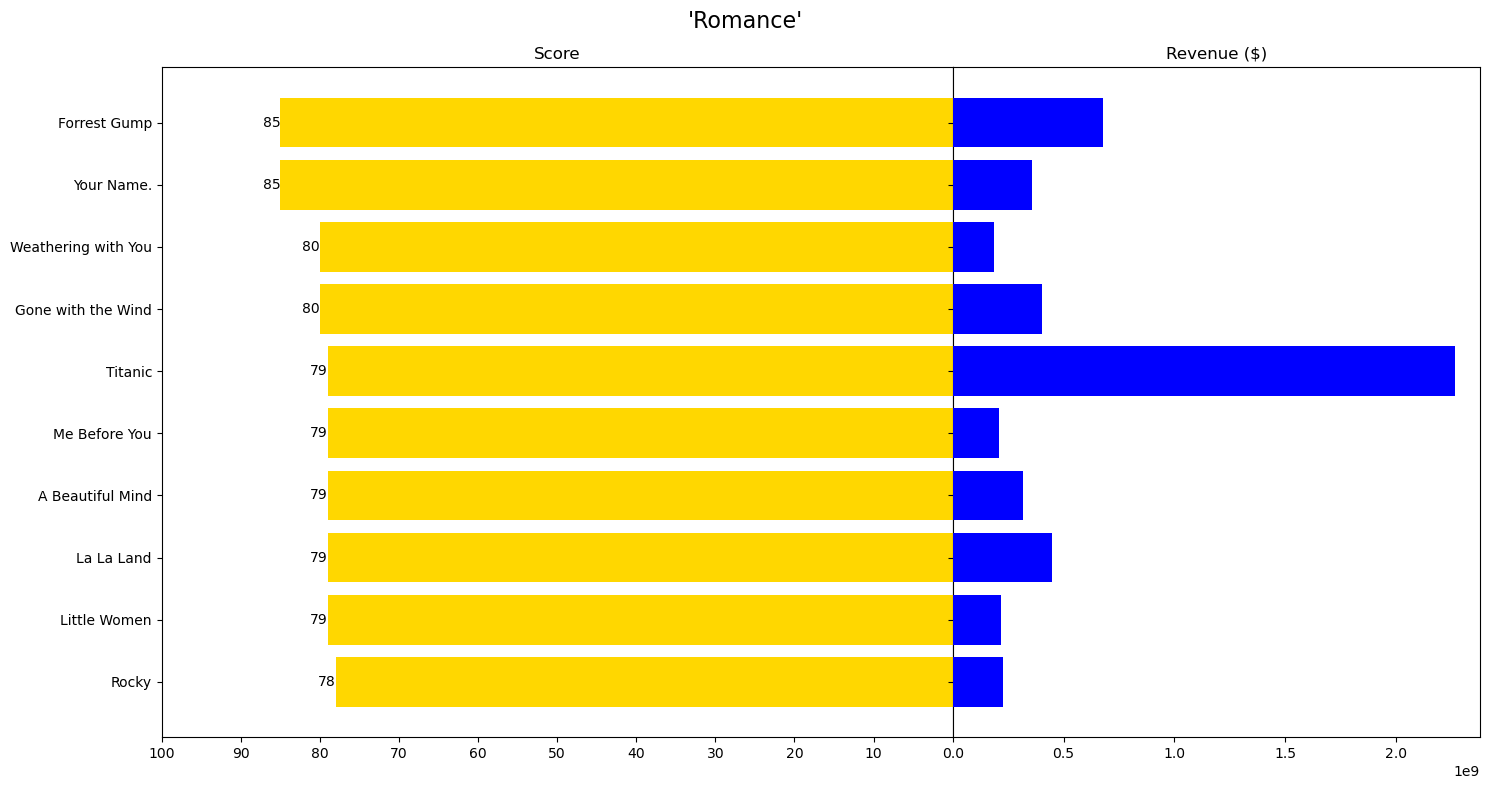

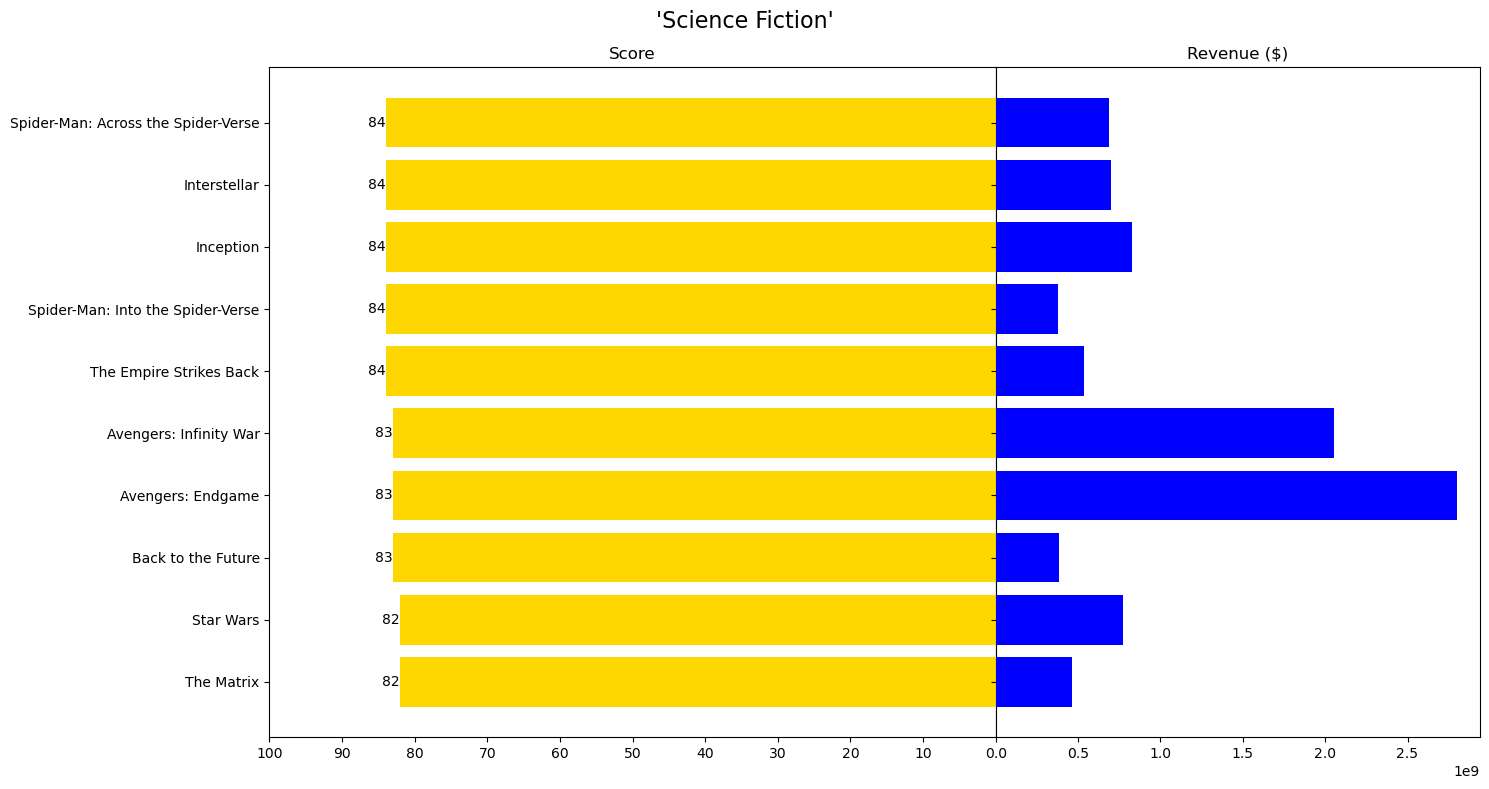

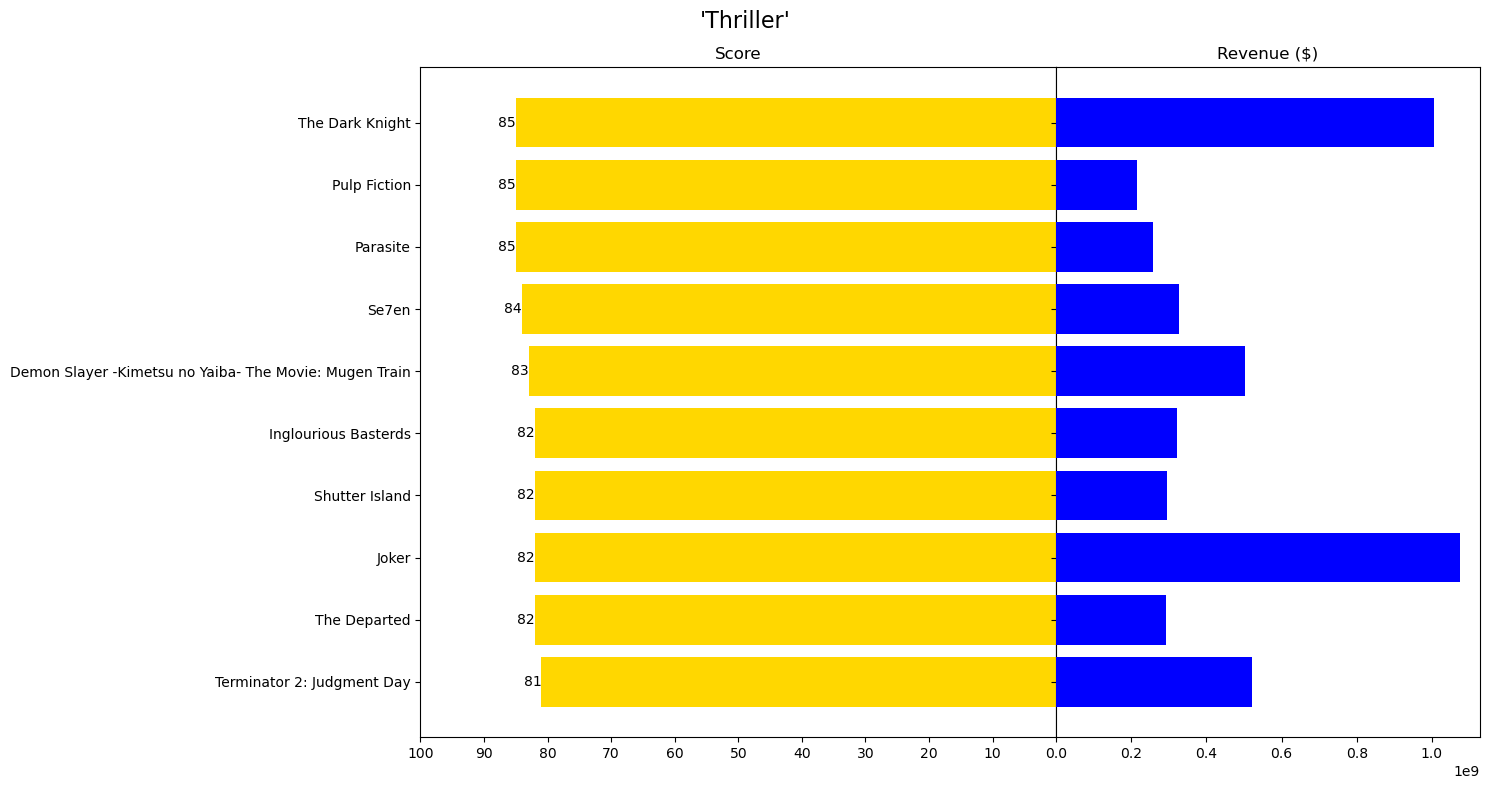

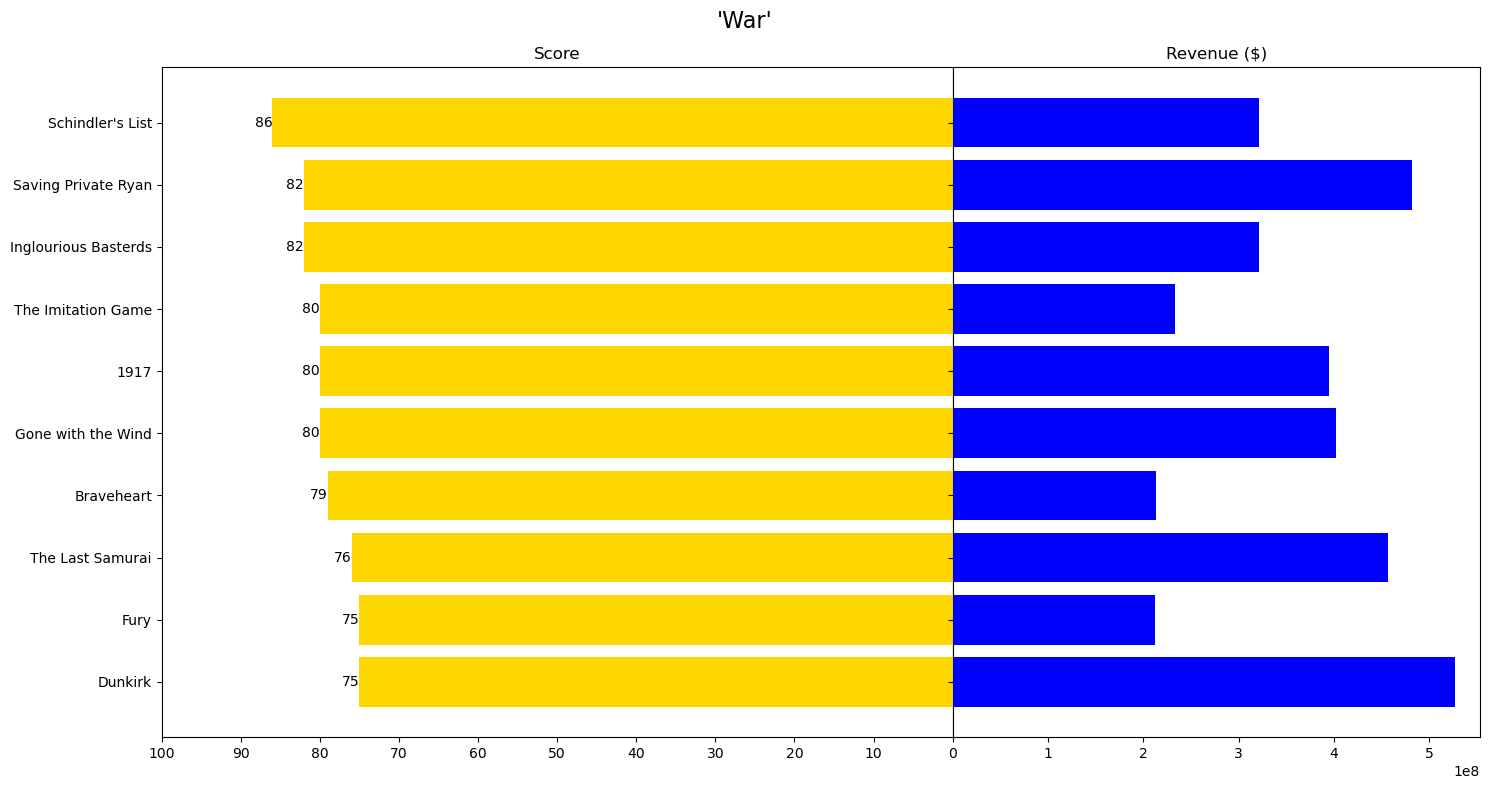

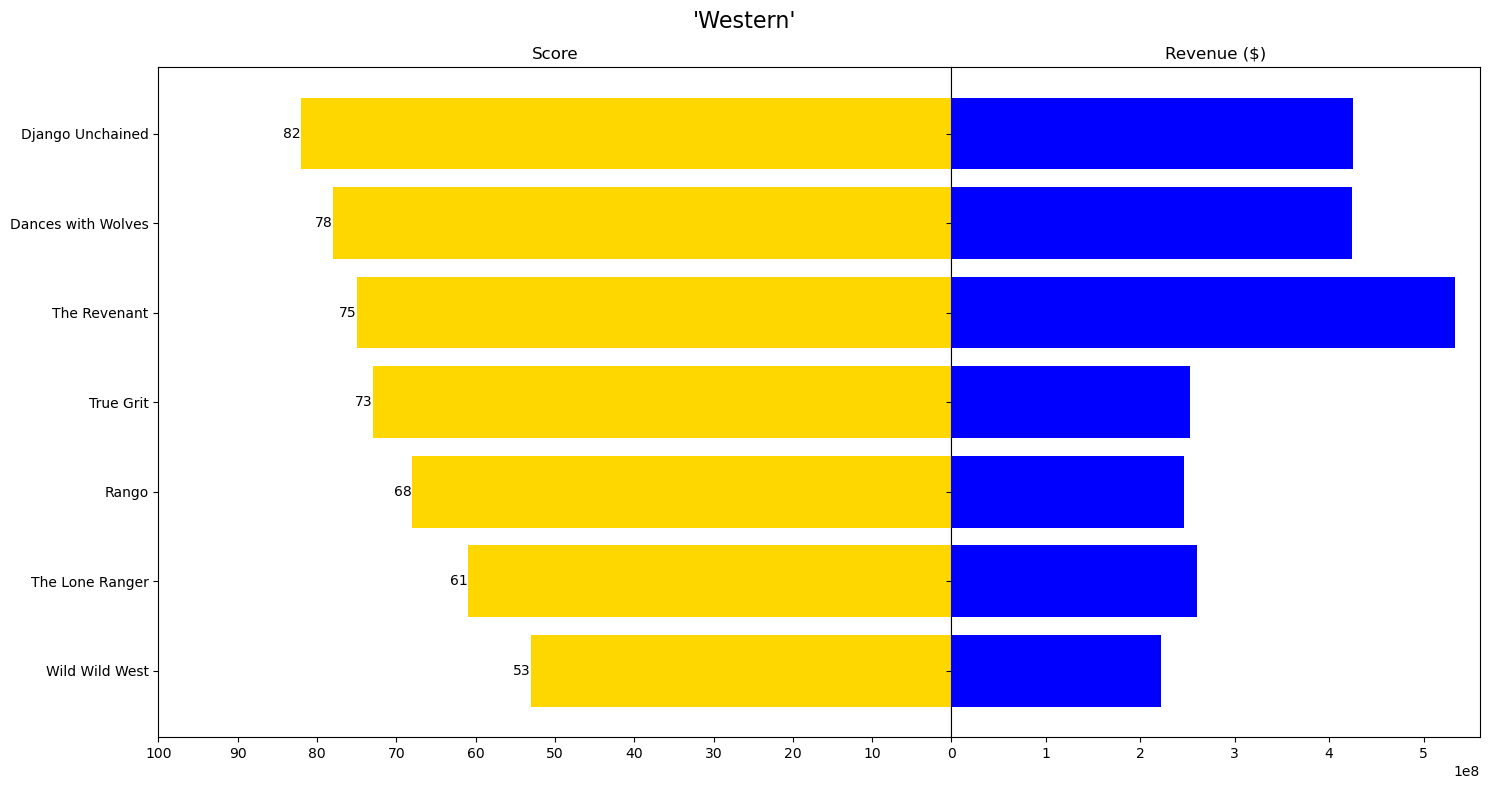

In [9]:
for genre in cleaned_df.Genre.unique():
    df = cleaned_df[cleaned_df['Genre']==genre].iloc[::-1]
    movies = df['Name']
    score = df['Score']
    revenue = df['Revenue ($)']
    
    fig, axes = plt.subplots(figsize=(15,8), ncols=2, sharey=True, gridspec_kw={'width_ratios': [1.5, 1]})
    fig.suptitle(genre,fontsize=16)
    p = axes[0].barh(movies, score, align='center', color='gold', zorder=10)
    axes[0].set(title='Score')
    axes[1].barh(movies, revenue, align='center', color='blue', zorder=10)
    axes[1].set(title='Revenue ($)')
    
    axes[0].invert_xaxis()
    axes[0].set(yticks=movies, yticklabels=movies, xticks=[10,20,30,40,50,60,70,80,90,100])
    axes[0].bar_label(p,label_type='edge')
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0)
    plt.show()

## Step 3: Give observations

- Based on the graph, we can identify the top 10 most high rated movie titles for each genre.

# Question 4: Does a movie with high scores tend to have high revenue?

## Step 0: Purpose

- Consider the impact of scores on movie revenue
- Determine the impact of scores on revenue so filmmakers know the important factors that help them increase revenue

## Step 1: Analyzing

In [10]:
#Filter out columns 'Name', 'Score' and 'Revenue ($)'
df = movie_df[['Name', 'Score', 'Revenue ($)']]
df = df[df['Revenue ($)'].notna()]
df

Name  Score  Revenue ($)
0                            Fast X   72.0  704709660.0
1              Trolls Band Together   72.0  173800000.0
3           Five Nights at Freddy's   78.0  286700000.0
4                       Oppenheimer   81.0  951000000.0
7                         Freelance   65.0    8000000.0
...                             ...    ...          ...
4992  Tucker: The Man and His Dream   67.0   19652638.0
4994                       Who Am I   76.0    7700259.0
4995           Secret in Their Eyes   64.0   34854990.0
4996              The Vatican Tapes   53.0    1784763.0
4997                   Song to Song   55.0    1710528.0

[3385 rows x 3 columns]

## Step 2: Visualization

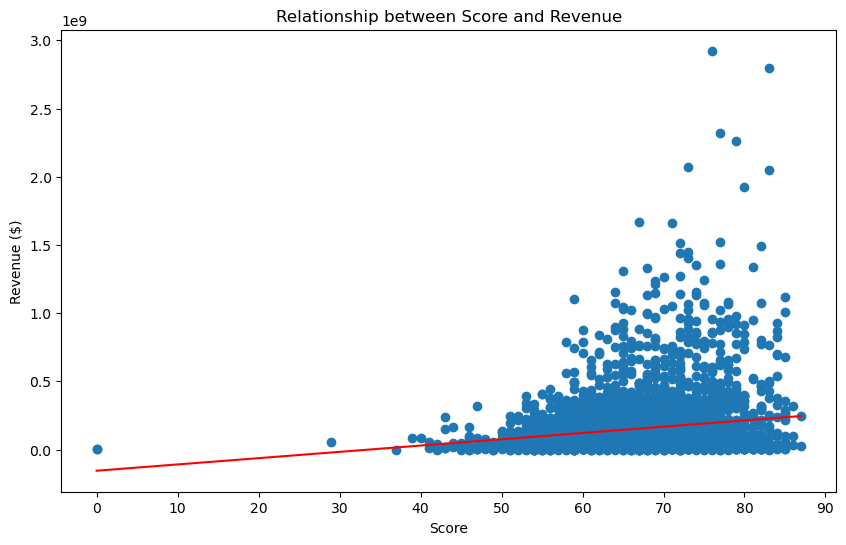

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['Revenue ($)'])

coefs = np.polyfit(df['Score'], df['Revenue ($)'], 1)
line = np.poly1d(coefs)
x = np.linspace(df['Score'].min(), df['Score'].max(), 100)
plt.plot(x, line(x), color='red')

plt.xlabel('Score')
plt.xticks(range(int(df['Score'].min()), int(df['Score'].max()) + 10, 10))
plt.ylabel('Revenue ($)')
plt.title('Relationship between Score and Revenue')

plt.show()

## Step 3: Give observations

- Based on the scatter plot, the upward regression line shows a positive relationship between score and revenue
- However, the regression line just points slightly upward and the scattered points are concentrated in the lower right corner of the plot
> We see that the highest revenues of movie are up to 3 billion dollars. However, only a few movies with high scores have high revenues. There are many movies with revenues under 1 billion dollars and scores from 40 to 90, but the majority of films have a revenue of less than 500 million dollars
>
> => Scores are not an important factor affecting movie revenue because movies with scores as high as 90 also have revenues mostly under 1 billion dollars but movies with scores around 40 also have similar revenues.

# Question 5: Determine the ideal runtime for a movie

## Step 0: Purpose
- Based on good quality movies to determine the ideal runtime for a movie

## Step 1: Analyzing

In [12]:
#Filter out columns 'Name', 'Runtime (h)', Score' and 'Revenue ($)'
df = movie_df[['Name', 'Runtime (h)', 'Score', 'Revenue ($)']]
df = df[(df['Revenue ($)'].notna()) & (df['Runtime (h)'].notna())]

#Calculate the 75th percentile of score and revenue
score_75 = df['Score'].quantile(0.75)
revenue_75 = df['Revenue ($)'].quantile(0.75)

#Filter out good quality movies with their scores and revenues above the 75th percentile
df = df[(df['Score'] >= score_75) & (df['Revenue ($)'] >= revenue_75)]
df

Name  Runtime (h)  Score  \
3                               Five Nights at Freddy's         1.83   78.0   
4                                           Oppenheimer         3.02   81.0   
8     The Hunger Games: The Ballad of Songbirds & Sn...         2.62   73.0   
9         Mission: Impossible - Dead Reckoning Part One         2.73   76.0   
20                             Avatar: The Way of Water         3.20   77.0   
...                                                 ...          ...    ...   
3452                                    Minority Report         2.42   73.0   
3488                                       The Stranger         1.58   73.0   
3522                                       Paddington 2         1.73   75.0   
4305                                 As Good as It Gets         2.32   74.0   
4494                                                JFK         3.15   76.0   

       Revenue ($)  
3     2.867000e+08  
4     9.510000e+08  
8     2.584000e+08  
9     5.671490e+08  
20    2.320250e+09  
...            ...  
3452  3.583729e+08  
3488  3.220000e+08  
3522  2.273000e+08  
4305  3.141780e+08  
4494  2.054055e+08  

[279 rows x 4 columns]

## Step 2: Visualization

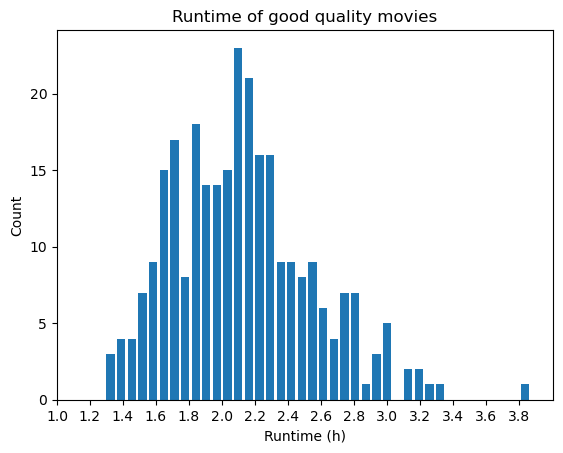

In [13]:
plt.hist(df['Runtime (h)'], bins=40, width=0.05)

plt.xlabel('Runtime (h)')
plt.ylabel('Count')
plt.title('Runtime of good quality movies')
plt.xticks(np.arange(1, int(df['Runtime (h)'].max()) + 1, 0.2))

plt.show()

## Step 3: Give observation

- Based on the chart, we see that most good movies have a runtime between 1.6 and 2.8 hours
- Therefore, filmmakers should produce films of reasonable runtime to get the best score and revenue

# Question 6: What is the interest in watching movies over the years?

## Step 0: Purpose
-  The above question aims to understand how people's engagement with movies has changed or remained constant over time. Film producers should rely on the observations in this question to grasp audience tastes.

## Step 1: Analyzing
- I will consider the `Genre` and `Released year` columns with performing *one-hot encoding* on `Genre` column and creating `one_hot_df`. I also filter the released movies. 

In [14]:
released_movies = movie_df[movie_df['Status'] == 'Released']
one_hot_df = pd.DataFrame()

bin_edges = range(released_movies['Released year'].min(), released_movies['Released year'].max() + 11, 10)
released_movies['Year bin'] = pd.cut(released_movies['Released year'], bins=bin_edges, labels=False, include_lowest = True)

last_bin_label = released_movies['Year bin'].max()
released_movies.loc[released_movies['Year bin'] == last_bin_label, 'Year bin'] = last_bin_label - 1

bins = []
for i in range(0, 10):
    vals = released_movies.loc[released_movies['Year bin'] == i, 'Released year'].unique()
    bins.append(f'({vals.min()}, {vals.max()})')

released_movies = released_movies.drop(['Released year'], axis = 1)

def splitString(s):
    if s is np.nan:
        return None
    return s.split(', ')

fixed_df = released_movies['Genre'].apply(splitString)
stack = fixed_df.agg(pd.Series).stack()
dummy = pd.get_dummies(stack).groupby(level = 0).sum()
one_hot_df = pd.concat([one_hot_df, dummy], axis = 1)
one_hot_df = one_hot_df.fillna(0)
one_hot_df

'Action'  'Adventure'  'Animation'  'Comedy'  'Crime'  'Documentary'  \
0            1            0            0         0        1              0   
1            0            0            1         1        0              0   
2            1            0            0         0        0              0   
3            0            0            0         0        0              0   
4            0            0            0         0        0              0   
...        ...          ...          ...       ...      ...            ...   
4995         0            0            0         0        1              0   
4996         0            0            0         0        0              0   
4997         0            0            0         0        0              0   
4998         0            0            0         1        0              0   
4999         1            1            0         1        0              0   

      'Drama'  'Family'  'Fantasy'  'History'  'Horror'  'Music'  'Mystery'  \
0           0         0          0          0         0        0          0   
1           0         1          1          0         0        1          0   
2           0         0          0          0         0        0          0   
3           0         0          0          0         1        0          1   
4           1         0          0          1         0        0          0   
...       ...       ...        ...        ...       ...      ...        ...   
4995        1         0          0          0         0        0          1   
4996        0         0          0          0         1        0          0   
4997        1         0          0          0         0        1          0   
4998        0         0          0          0         0        0          0   
4999        0         0          0          0         0        0          0   

      'Romance'  'Science Fiction'  'TV Movie'  'Thriller'  'War'  'Western'  
0             0                  0           0           1      0          0  
1             0                  0           0           0      0          0  
2             0                  1           0           0      0          0  
3             0                  0           0           0      0          0  
4             0                  0           0           0      0          0  
...         ...                ...         ...         ...    ...        ...  
4995          0                  0           0           1      0          0  
4996          0                  0           0           1      0          0  
4997          1                  0           0           0      0          0  
4998          0                  0           0           0      0          0  
4999          0                  0           0           0      0          0  

[4982 rows x 19 columns]

- Then, joining `Released year` in `one_hot_df` to create a new dataframe call `scent_df`. After that, group by `Released year` to find out distribution of scent for each year. Save to `distribution` dataframe.

In [15]:
scent_df = one_hot_df.join(released_movies['Year bin'])

distribution = pd.DataFrame()
mask = scent_df.drop(columns = ['Year bin']).eq(1)
result = mask.groupby(scent_df['Year bin']).sum()
distribution = pd.concat([distribution, result], axis = 1)

# convert to frequency
for i, row in distribution.iterrows():
    sum_row = row.sum()
    for col in distribution.columns:
        distribution.at[i, col] = row[col] / sum_row
distribution

'Action'  'Adventure'  'Animation'  'Comedy'   'Crime'  \
Year bin                                                           
0         0.000000     0.000000     0.000000  0.000000  0.055556   
1         0.000000     0.047619     0.119048  0.023810  0.000000   
2         0.000000     0.041667     0.041667  0.083333  0.083333   
3         0.056338     0.105634     0.028169  0.091549  0.035211   
4         0.113861     0.123762     0.044554  0.103960  0.044554   
5         0.089286     0.093750     0.029018  0.087054  0.044643   
6         0.125911     0.094693     0.038502  0.126951  0.058273   
7         0.113530     0.083981     0.050804  0.113530  0.063245   
8         0.114715     0.097022     0.067532  0.117370  0.042760   
9         0.126390     0.084057     0.059845  0.105375  0.039744   

          'Documentary'   'Drama'  'Family'  'Fantasy'  'History'  'Horror'  \
Year bin                                                                      
0              0.000000  0.333333  0.000000   0.111111   0.055556  0.111111   
1              0.000000  0.214286  0.166667   0.119048   0.000000  0.071429   
2              0.000000  0.208333  0.083333   0.125000   0.000000  0.020833   
3              0.000000  0.176056  0.056338   0.042254   0.035211  0.042254   
4              0.000000  0.108911  0.069307   0.034653   0.014851  0.029703   
5              0.000000  0.174107  0.033482   0.031250   0.013393  0.098214   
6              0.000000  0.129032  0.047867   0.062435   0.010406  0.054110   
7              0.001037  0.134785  0.058580   0.060653   0.011923  0.036807   
8              0.001180  0.113536  0.074314   0.064288   0.009437  0.045119   
9              0.006700  0.117405  0.055885   0.059997   0.014009  0.063195   

           'Music'  'Mystery'  'Romance'  'Science Fiction'  'TV Movie'  \
Year bin                                                                  
0         0.000000   0.000000   0.111111           0.055556    0.000000   
1         0.000000   0.047619   0.119048           0.023810    0.000000   
2         0.020833   0.020833   0.104167           0.020833    0.000000   
3         0.014085   0.035211   0.084507           0.056338    0.000000   
4         0.014851   0.019802   0.039604           0.034653    0.019802   
5         0.006696   0.033482   0.058036           0.062500    0.008929   
6         0.008325   0.014568   0.050989           0.062435    0.003122   
7         0.006739   0.036288   0.059616           0.059616    0.001037   
8         0.007962   0.032144   0.052197           0.052492    0.006193   
9         0.008375   0.034567   0.045683           0.053601    0.010659   

          'Thriller'     'War'  'Western'  
Year bin                                   
0           0.000000  0.166667   0.000000  
1           0.023810  0.023810   0.000000  
2           0.125000  0.000000   0.020833  
3           0.056338  0.028169   0.056338  
4           0.079208  0.034653   0.069307  
5           0.095982  0.029018   0.011161  
6           0.089490  0.012487   0.010406  
7           0.094868  0.009331   0.003629  
8           0.090534  0.008552   0.002654  
9           0.101568  0.009746   0.003198

## Step 2: Visualization

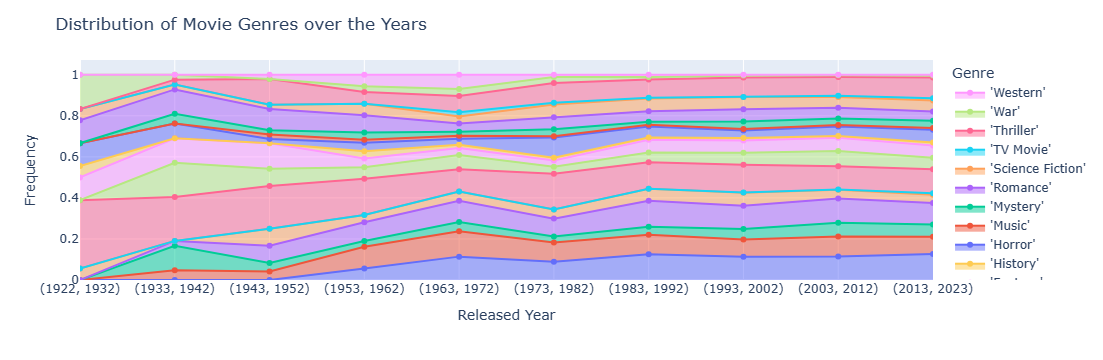

In [16]:
fig = px.area(distribution, markers = True)

fig.update_xaxes(tickvals = np.arange(0, 10), ticktext = bins)

fig.update_layout(
    xaxis_title = 'Released Year',
    yaxis_title = 'Frequency',
    title = 'Distribution of Movie Genres over the Years',
    legend_title = 'Genre',
    legend_traceorder="reversed"
)
fig.show()

# export html file to see the plot
fig.write_html("./figures/plot.html")

## Step 3: Give observation
- According to the chart, we can see that over the years dramas account for a large number of movies. This is understandable, because most dramas have easy-to-understand and coherent plots, suitable for most audiences.
- Drama is followed by action, comedy and thriller. These types of movies bring laughter or thrill to the audience, making the movie watching experience better. Therefore, these genres have a certain foothold in the hearts of fans.
- Explains the high frequency from 1922 to 1932, the number of movies during this period was very small and mainly low budget films such as dramas, romance, family, etc. Therefore, genres mentioned above had a high count.
- Genres such as documentary, western, musical and war receive little attention. This can be explained by its dryness or high level of common sense, which was only popular during a certain period of time (usually before the 90s) and has gradually become obsolete in recent years.
- Some genres like romance, animation, horror are not much over the years but still have an average number of audiences.

# Question 7: What movie genres work well together?

## Step 0: Purpose
- Helps production knows which movie genres can be easily combined, thereby increasing the company's profits based on popular genres that audiences often choose to watch.

## Step 1: Analyzing

In [17]:
# preprocessing
fixed_df = movie_df[['Name','Genre','Score','Revenue ($)']].reset_index(drop = True)
fixed_df['Genre'] = fixed_df['Genre'].str.split(', ')
fixed_df = fixed_df.explode('Genre').query('Genre == Genre')

temp = fixed_df[(fixed_df['Genre'] == "'Action'") | (fixed_df['Genre'] == "'Thriller'")].index
temp = temp.shape[0] - temp.nunique()

combination_df = pd.DataFrame(index = fixed_df['Genre'].unique(), columns = fixed_df['Genre'].unique())

# assign the count of combination
for i in range(len(fixed_df['Genre'].unique()) - 1):
    for j in range(i + 1, len(fixed_df['Genre'].unique())):
        temp = fixed_df[(fixed_df['Genre'] == fixed_df['Genre'].unique()[i]) | 
                        (fixed_df['Genre'] == fixed_df['Genre'].unique()[j])].index
        combination_df.at[fixed_df['Genre'].unique()[i],
        fixed_df['Genre'].unique()[j]] = temp.shape[0] - temp.nunique() if temp.shape[0] - temp.nunique() else 0
combination_df = combination_df.T.fillna(0)
combination_df

'Action'  'Crime'  'Thriller'  'Animation'  'Family'  \
'Action'                  0        0           0            0         0   
'Crime'                 306        0           0            0         0   
'Thriller'              612      344           0            0         0   
'Animation'             242       15          13            0         0   
'Family'                105        6           2          496         0   
'Music'                   6        4           2           20        27   
'Fantasy'               285       15          58          305       342   
'Comedy'                284      143          74          337       483   
'Science Fiction'       464       22         212          145        75   
'Horror'                125       32         365           15        10   
'Mystery'                84       90         279           37        22   
'Drama'                 323      246         412           77       103   
'History'                50       10          17            3         2   
'Romance'                44       18          40           51        66   
'War'                    80        0          25            4         0   
'Adventure'             670       47         195          371       411   
'TV Movie'               11        2           7           26        39   
'Western'                24        3           4            4         4   
'Documentary'             1        1           0            0         0   

                   'Music'  'Fantasy'  'Comedy'  'Science Fiction'  'Horror'  \
'Action'                 0          0         0                  0         0   
'Crime'                  0          0         0                  0         0   
'Thriller'               0          0         0                  0         0   
'Animation'              0          0         0                  0         0   
'Family'                 0          0         0                  0         0   
'Music'                  0          0         0                  0         0   
'Fantasy'               19          0         0                  0         0   
'Comedy'                44        277         0                  0         0   
'Science Fiction'        3         87       103                  0         0   
'Horror'                 0         95        80                121         0   
'Mystery'                1         33        44                 64       169   
'Drama'                 61        142       310                113        98   
'History'                7          3         7                  0         3   
'Romance'               37         77       340                 24         8   
'War'                    0          4         8                  7         6   
'Adventure'             12        419       374                303        38   
'TV Movie'               6         22        56                 13         4   
'Western'                0          1        12                  3         0   
'Documentary'            7          1         0                  0         1   

                   'Mystery'  'Drama'  'History'  'Romance'  'War'  \
'Action'                   0        0          0          0      0   
'Crime'                    0        0          0          0      0   
'Thriller'                 0        0          0          0      0   
'Animation'                0        0          0          0      0   
'Family'                   0        0          0          0      0   
'Music'                    0        0          0          0      0   
'Fantasy'                  0        0          0          0      0   
'Comedy'                   0        0          0          0      0   
'Science Fiction'          0        0          0          0      0   
'Horror'                   0        0          0          0      0   
'Mystery'                  0        0          0          0      0   
'Drama'                  142        0          0          0      0   
'Histor

## Step 2: Visualization

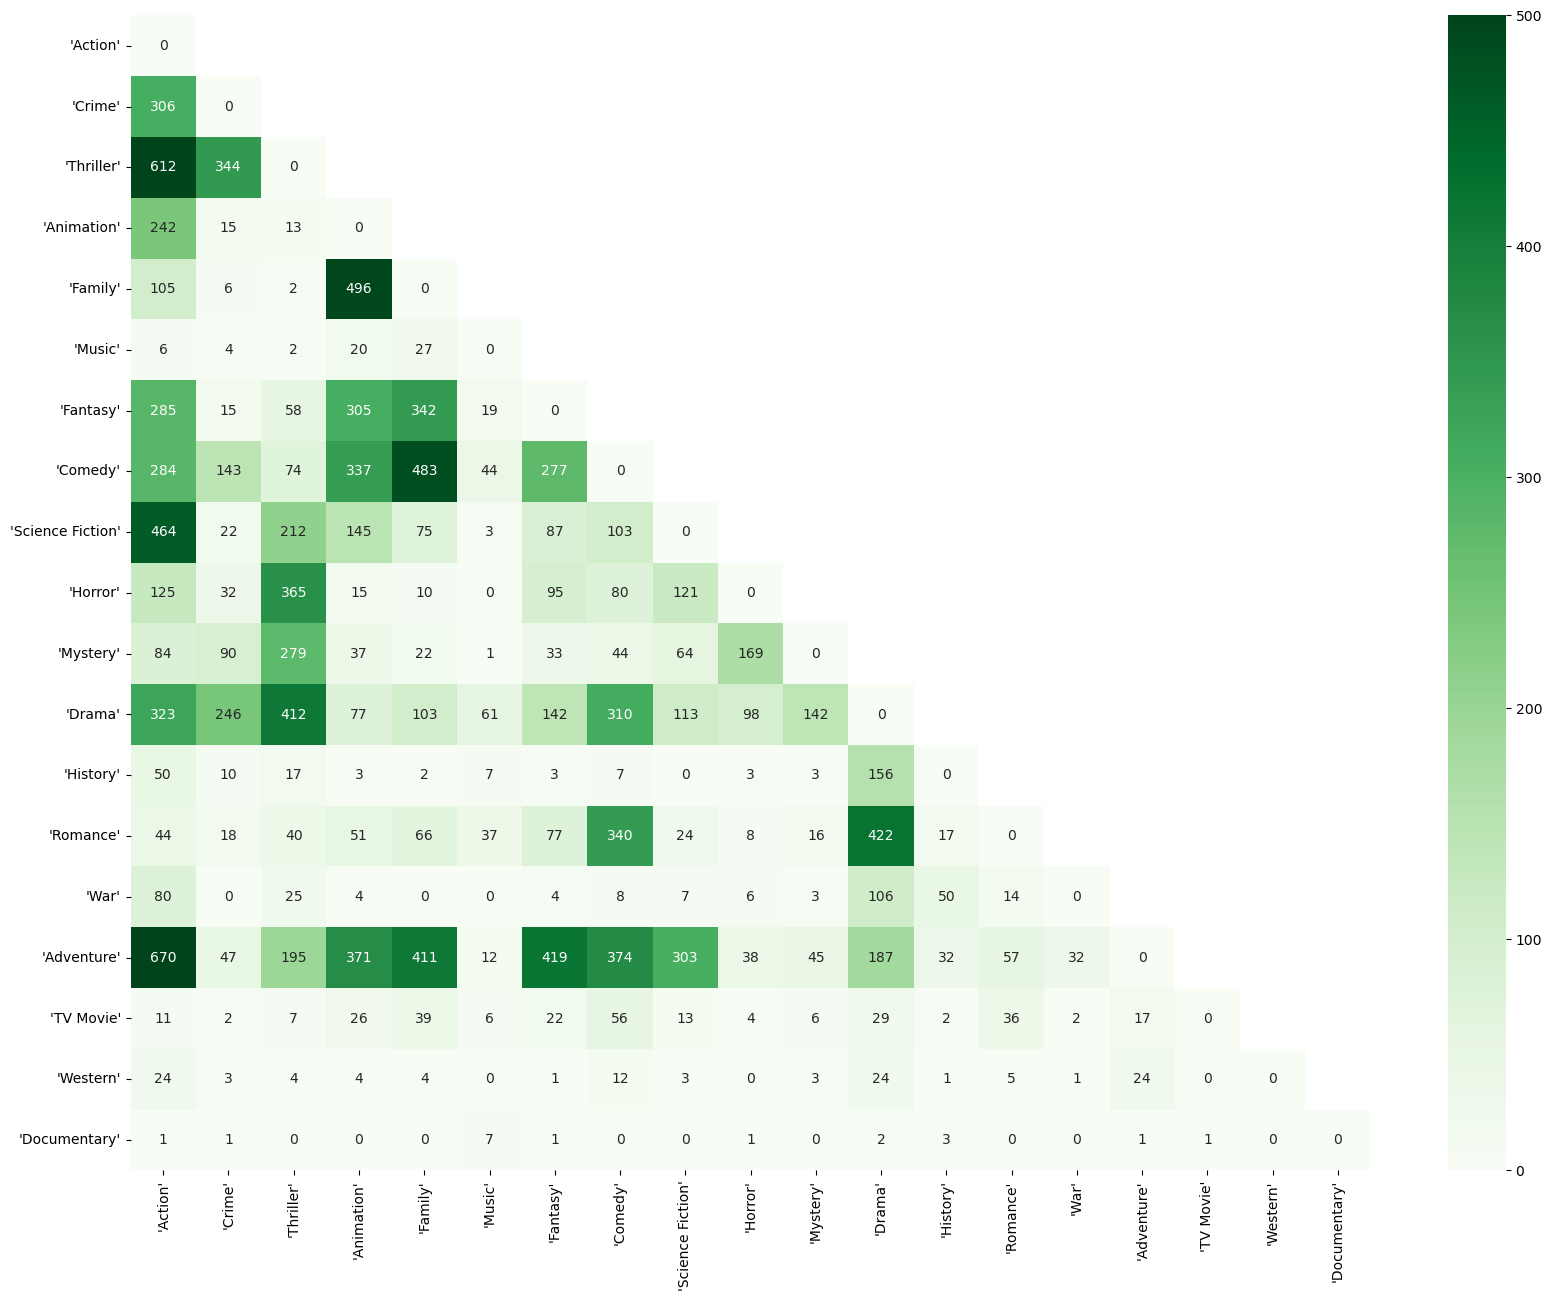

In [18]:
plt.figure(figsize = (20, 15))
mask = np.triu(np.ones_like(combination_df), k = 1)
sns.heatmap(combination_df, annot = True, fmt = 'd', cmap = 'Greens', mask = mask, vmin = 0, vmax = 500)
plt.show()

## Step 3: Give observation

- According to the heatmap, we can see some pair of genres have combined regularly:
    - `Action` and `Adventure`.
    - `Action` and `Thriller`.
    - `Family` and `Comedy`.
    - `Family` and `Animation`.
- That's understandable because their nature is the same. One side is a movie genre that brings dramatic suspense, the other side brings laughter or a feeling of relaxation.
- In conclusion, we recommend that filmmakers should make genre combination as below:
    - `Action`, `Adventure` and `Thriller`.
    - `Family`, `Comedy` and `Animation`.